In [4]:
from sogo.SogoGame import SogoGame, display as display_board
import numpy as np
from sogo.keras.NNet import NNetWrapper as NNet

from Config import Config
from sogo.keras.NNet import NNArgs
# nnet players
config = Config(
    load_folder_file=('./save/', 'discount925_fresh_eps40_mcts512_iter10.h5'),
    num_mcts_sims=150,
    root_dirichlet_alpha=0.3,
    root_exploration_fraction=0.0,
    mcts_discount=0.9,
    pb_c_base=19652,
    pb_c_init=1.25)
config.nnet_args = NNArgs(lr=0.001, 
                              batch_size=1024, 
                              epochs=20)

game = SogoGame(4)

def setup_board(plays,verbose=True): 
    board = game.init_board()
    player = 1    
    for play in plays:
        board, player = game.next_state(board, player,play)
    if verbose:
        display_board(board)
    return board, player

In [5]:
nn = NNet(game, config)
nn.load_checkpoint(*(config.load_folder_file)) 
model = nn.nnet.model

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras import backend as K

def plot_layer_outputs(inpt, layer_number):    
    layer_func = K.function([model.input],[model.layers[layer_number].output])
    
    layer_output = layer_func([inpt[np.newaxis,...]])[0][0]

    x_max = layer_output.shape[0]
    y_max = layer_output.shape[1]
    n     = layer_output.shape[2]
    
    print(layer_output.shape)

    L = []
    for i in range(n):
        L.append(np.zeros((x_max, y_max)))

    for i in range(n):
        for x in range(x_max):
            for y in range(y_max):
                L[i][x][y] = layer_output[x][y][i]


    return L

def plot(img):
    plt.figure()
    plt.imshow(img, interpolation='nearest')


In [24]:
def plot_layer(plays, layer):
    b,p = setup_board(plays, verbose = False)
    b = game.canonical_board(b,p)
    return plot_layer_outputs(b, layer)

In [25]:
[(i, l.output_shape, l.name) for i,l in enumerate(model.layers)]

[(0, (None, 4, 4, 4, 2), 'input_1'),
 (1, (None, 4, 4, 4, 48), 'conv3d_2'),
 (2, (None, 4, 4, 4, 48), 'batch_normalization_2'),
 (3, (None, 4, 4, 4, 48), 'activation_2'),
 (4, (None, 4, 4, 4, 192), 'conv3d_3'),
 (5, (None, 4, 4, 4, 24), 'conv3d_5'),
 (6, (None, 4, 4, 4, 24), 'conv3d_7'),
 (7, (None, 4, 4, 4, 24), 'conv3d_9'),
 (8, (None, 4, 4, 4, 192), 'batch_normalization_3'),
 (9, (None, 4, 4, 4, 24), 'batch_normalization_5'),
 (10, (None, 4, 4, 4, 24), 'batch_normalization_7'),
 (11, (None, 4, 4, 4, 24), 'batch_normalization_9'),
 (12, (None, 4, 4, 4, 192), 'activation_3'),
 (13, (None, 4, 4, 4, 24), 'activation_5'),
 (14, (None, 4, 4, 4, 24), 'activation_7'),
 (15, (None, 4, 4, 4, 24), 'activation_9'),
 (16, (None, 4, 4, 4, 48), 'conv3d_1'),
 (17, (None, 4, 4, 4, 48), 'conv3d_4'),
 (18, (None, 4, 4, 4, 48), 'conv3d_6'),
 (19, (None, 4, 4, 4, 48), 'conv3d_8'),
 (20, (None, 4, 4, 4, 48), 'conv3d_10'),
 (21, (None, 4, 4, 4, 48), 'batch_normalization_1'),
 (22, (None, 4, 4, 4, 48), 'ba

(4, 4, 288)


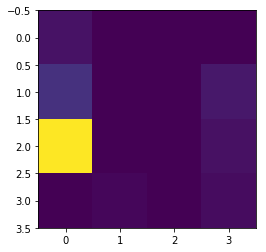

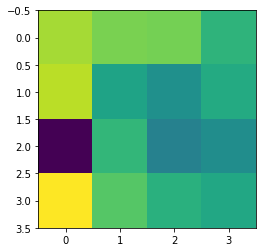

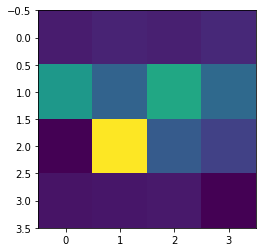

In [28]:
L = plot_layer([2],55)
for i in range(3): plot(L[i])